In [1]:
'''
Golden url (data aleady saved as .txt files for import) for sensor:ES_B_02_412_3E68 & ES_B_12_431_7BC2 
for desired data, copy to new tab in browser and copy to txt files
'''
url_2_412_temp = \
'https://eif-research.feit.uts.edu.au/api/csv/?rFromDate=2021-05-01T00%3A00%3A01&rToDate=2021-07-30T23%3A59%3A59&rFamily=wasp&rSensor=ES_B_02_412_3E68&rSubSensor=TCA#collapseOne'
url_2_412_huma = \
'https://eif-research.feit.uts.edu.au/api/csv/?rFromDate=2021-05-01T00%3A00%3A01&rToDate=2021-07-30T23%3A59%3A59&rFamily=wasp&rSensor=ES_B_02_412_3E68&rSubSensor=HUMA#collapseOne'
url_12_431_temp = \
'https://eif-research.feit.uts.edu.au/api/csv/?rFromDate=2021-05-01T00%3A00%3A01&rToDate=2021-07-30T23%3A59%3A59&rFamily=wasp&rSensor=ES_B_12_431_7BC2&rSubSensor=TCA#collapseOne'
url_12_431_huma = \
'https://eif-research.feit.uts.edu.au/api/csv/?rFromDate=2021-05-01T00%3A00%3A01&rToDate=2021-07-30T23%3A59%3A59&rFamily=wasp&rSensor=ES_B_12_431_7BC2&rSubSensor=HUMA#collapseOne'

In [2]:
# import necessary packages for use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings

In [3]:
# make dataframe for temperature data collected by sensor ES_B_02_412_3E68
Temp_Cel_02_412 = pd.read_csv('ES_B_02_412_3E68_temp.txt', names = ('Date & Time', 'Temperature (°C)'), engine = 'python')
Temp_Cel_02_412['Date & Time'] = pd.to_datetime(Temp_Cel_02_412['Date & Time'])
Temp_Cel_02_412['Temperature (°C)'] = round(Temp_Cel_02_412['Temperature (°C)'].astype('float64'),2)

# make dataframe for humidity data collected by sensor ES_B_02_412_3E68
Huma_02_412 = pd.read_csv('ES_B_02_412_3E68_huma.txt', names = ('Date & Time', 'Humidity (%)'), engine = 'python')
Huma_02_412['Date & Time'] = pd.to_datetime(Huma_02_412['Date & Time'])
Huma_02_412['Humidity (%)'] = round(Huma_02_412['Humidity (%)'].astype('float64'),2)

# make dataframe for temperature data collected by sensor ES_B_12_431_7BC2
Temp_Cel_12_431 = pd.read_csv('ES_B_12_431_7BC2_temp.txt', names = ('Date & Time', 'Temperature (°C)'), engine = 'python')
Temp_Cel_12_431['Date & Time'] = pd.to_datetime(Temp_Cel_12_431['Date & Time'])
Temp_Cel_12_431['Temperature (°C)'] = round(Temp_Cel_12_431['Temperature (°C)'].astype('float64'),2)

# make dataframe for humidity data collected by sensor ES_B_12_431_7BC2
Huma_12_431 = pd.read_csv('ES_B_12_431_7BC2_huma.txt', names = ('Date & Time', 'Humidity (%)'), engine = 'python')
Huma_12_431['Date & Time'] = pd.to_datetime(Huma_12_431['Date & Time'])
Huma_12_431['Humidity (%)'] = round(Huma_12_431['Humidity (%)'].astype('float64'),2)

display(Temp_Cel_02_412.head()) 
display(Huma_02_412.head())
display(Temp_Cel_02_412.head())
display(Huma_12_431.head())

,Date & Time,Temperature (°C)
0,2021-05-01 00:00:59,21.65
1,2021-05-01 00:08:03,22.45
2,2021-05-01 00:15:07,22.61
3,2021-05-01 00:22:11,21.97
4,2021-05-01 00:29:15,21.55


,Date & Time,Humidity (%)
0,2021-05-01 00:00:59,59.63
1,2021-05-01 00:08:03,59.56
2,2021-05-01 00:15:07,59.52
3,2021-05-01 00:22:11,59.66
4,2021-05-01 00:29:15,59.94


,Date & Time,Temperature (°C)
0,2021-05-01 00:00:59,21.65
1,2021-05-01 00:08:03,22.45
2,2021-05-01 00:15:07,22.61
3,2021-05-01 00:22:11,21.97
4,2021-05-01 00:29:15,21.55


,Date & Time,Humidity (%)
0,2021-05-01 00:05:11,54.02
1,2021-05-01 00:12:14,54.18
2,2021-05-01 00:19:19,54.23
3,2021-05-01 00:26:22,54.27
4,2021-05-01 00:33:26,54.25


In [4]:
# Check datatypes of dataframe columns
Temp_Cel_02_412.dtypes

Date & Time         datetime64[ns]
Temperature (°C)           float64
dtype: object

In [5]:
# Merge Temperature & Humidity columns for each room
Temp_Cel_Huma_02_412 = pd.merge(Temp_Cel_02_412, Huma_02_412, 
                                     on = 'Date & Time', how='inner')

Temp_Cel_Huma_12_431 = pd.merge(Temp_Cel_12_431, Huma_12_431, 
                                     on = ['Date & Time'], how='inner')

print(Temp_Cel_Huma_02_412.head(), '\n', Temp_Cel_Huma_12_431.head())

          Date & Time  Temperature (°C)  Humidity (%)
0 2021-05-01 00:00:59             21.65         59.63
1 2021-05-01 00:08:03             22.45         59.56
2 2021-05-01 00:15:07             22.61         59.52
3 2021-05-01 00:22:11             21.97         59.66
4 2021-05-01 00:29:15             21.55         59.94 
           Date & Time  Temperature (°C)  Humidity (%)
0 2021-05-01 00:05:11             21.58         54.02
1 2021-05-01 00:12:14             21.16         54.18
2 2021-05-01 00:19:19             22.39         54.23
3 2021-05-01 00:26:22             22.16         54.27
4 2021-05-01 00:33:26             21.87         54.25


In [6]:
# set temp & huma categories by standard: https://www7.nau.edu/itep/main/eeop/docs/airqlty/AkIAQ_ThermalComfort.pdf
temp_acce_lower_lim=20.00
temp_acce_upper_lim=23.50
huma_acce_lower_lim=30.00
huma_acce_upper_lim=60.00

bins_Temp_Winter = [0, temp_acce_lower_lim, temp_acce_upper_lim, np.inf]
bins_Huma = [0, huma_acce_lower_lim, huma_acce_upper_lim, np.inf]
Temp_categories_indoor = ['Low Temp', 'Acceptable Temp','High Temp']
Huma_categories_indoor = ['Dry', 'Acceptable Huma','Wet']

Temp_Cel_Huma_02_412['Temp_cats'] = pd.cut(Temp_Cel_Huma_02_412['Temperature (°C)'], bins_Temp_Winter, labels = Temp_categories_indoor)
Temp_Cel_Huma_02_412['Huma_cats'] = pd.cut(Temp_Cel_Huma_02_412['Humidity (%)'], bins_Huma, labels = Huma_categories_indoor)

Temp_Cel_Huma_12_431['Temp_cats'] = pd.cut(Temp_Cel_Huma_12_431['Temperature (°C)'], bins_Temp_Winter, labels = Temp_categories_indoor)
Temp_Cel_Huma_12_431['Huma_cats'] = pd.cut(Temp_Cel_Huma_12_431['Humidity (%)'], bins_Huma, labels = Huma_categories_indoor)

# Temp_Cel_Huma_02_412.dtypes

# show each category counts
print(f"02_412_Temp_cats: \n{Temp_Cel_Huma_02_412['Temp_cats'].value_counts()}\n\n02_412_Huma_cats: \n{Temp_Cel_Huma_02_412['Huma_cats'].value_counts()}\n\n12_431_Temp_cats: \n{Temp_Cel_Huma_12_431['Temp_cats'].value_counts()}\n\n12_431_Huma_cats: \n{Temp_Cel_Huma_12_431['Huma_cats'].value_counts()}")

02_412_Temp_cats: 
Low Temp           8430
Acceptable Temp    8317
High Temp          1427
Name: Temp_cats, dtype: int64

02_412_Huma_cats: 
Acceptable Huma    16420
Wet                  877
Dry                  877
Name: Huma_cats, dtype: int64

12_431_Temp_cats: 
Acceptable Temp    12527
Low Temp            5676
High Temp              2
Name: Temp_cats, dtype: int64

12_431_Huma_cats: 
Acceptable Huma    13653
Dry                 4490
Wet                   62
Name: Huma_cats, dtype: int64


In [7]:
# check time differences among each date & time data both sensors
Temp_Cel_Huma_02_412['Time_Diff'] = Temp_Cel_Huma_02_412['Date & Time'].diff().fillna(pd.Timedelta(seconds=0))

Temp_Cel_Huma_12_431['Time_Diff'] = Temp_Cel_Huma_12_431['Date & Time'].diff().fillna(pd.Timedelta(seconds=0))

display(Temp_Cel_Huma_02_412.head())
display(Temp_Cel_Huma_12_431.head())

,Date & Time,Temperature (°C),Humidity (%),Temp_cats,Huma_cats,Time_Diff
0,2021-05-01 00:00:59,21.65,59.63,Acceptable Temp,Acceptable Huma,0 days 00:00:00
1,2021-05-01 00:08:03,22.45,59.56,Acceptable Temp,Acceptable Huma,0 days 00:07:04
2,2021-05-01 00:15:07,22.61,59.52,Acceptable Temp,Acceptable Huma,0 days 00:07:04
3,2021-05-01 00:22:11,21.97,59.66,Acceptable Temp,Acceptable Huma,0 days 00:07:04
4,2021-05-01 00:29:15,21.55,59.94,Acceptable Temp,Acceptable Huma,0 days 00:07:04


,Date & Time,Temperature (°C),Humidity (%),Temp_cats,Huma_cats,Time_Diff
0,2021-05-01 00:05:11,21.58,54.02,Acceptable Temp,Acceptable Huma,0 days 00:00:00
1,2021-05-01 00:12:14,21.16,54.18,Acceptable Temp,Acceptable Huma,0 days 00:07:03
2,2021-05-01 00:19:19,22.39,54.23,Acceptable Temp,Acceptable Huma,0 days 00:07:05
3,2021-05-01 00:26:22,22.16,54.27,Acceptable Temp,Acceptable Huma,0 days 00:07:03
4,2021-05-01 00:33:26,21.87,54.25,Acceptable Temp,Acceptable Huma,0 days 00:07:04


In [8]:
# check % of each time difference values have fallen in
print(f"02_412: \n{round(Temp_Cel_Huma_02_412['Time_Diff'].value_counts(normalize=True),3)}\n\
        12_431: \n{round(Temp_Cel_Huma_12_431['Time_Diff'].value_counts(normalize=True),3)}")

02_412: 
0 days 00:07:04    0.705
0 days 00:07:03    0.115
0 days 00:07:05    0.115
0 days 00:07:07    0.029
0 days 00:14:08    0.009
0 days 00:07:08    0.005
0 days 00:07:06    0.004
0 days 00:14:10    0.004
0 days 00:07:10    0.004
0 days 00:14:09    0.002
0 days 00:14:07    0.001
0 days 00:07:09    0.001
0 days 00:14:11    0.001
0 days 00:07:11    0.001
0 days 00:07:12    0.000
0 days 00:14:13    0.000
0 days 00:14:14    0.000
0 days 00:14:12    0.000
0 days 00:21:14    0.000
0 days 00:21:11    0.000
0 days 00:21:12    0.000
0 days 00:07:16    0.000
0 days 00:21:15    0.000
0 days 00:07:44    0.000
0 days 00:14:20    0.000
0 days 00:21:17    0.000
0 days 00:21:16    0.000
0 days 00:14:15    0.000
0 days 00:06:58    0.000
0 days 00:00:00    0.000
Name: Time_Diff, dtype: float64
        12_431: 
0 days 00:07:04    0.710
0 days 00:07:03    0.113
0 days 00:07:05    0.113
0 days 00:07:07    0.029
0 days 00:14:10    0.007
0 days 00:14:08    0.006
0 days 00:07:08    0.005
0 days 00:07:06  

'00:07:04' is about 70.5% of all time differences for Rm.02.412, 

'00:07:04' is about 71.0% of all time differences for Rm.12.431

In [9]:
# drop 'Time_Diff' columns as they will be useless for future calculations
Temp_Cel_Huma_02_412 = Temp_Cel_Huma_02_412.drop('Time_Diff', axis = 1)
Temp_Cel_Huma_12_431 = Temp_Cel_Huma_12_431.drop('Time_Diff', axis = 1)

In [10]:
# apply merge_asof on both dataframes,
# adopt dataframe with higher % of '00:07:04' time differences as left dataframe, which is Rm.12_431
all_Temp_Huma = pd.merge_asof(Temp_Cel_Huma_12_431, Temp_Cel_Huma_02_412, on = ['Date & Time'], 
                              direction = 'nearest', suffixes=['_12_431', '_02_412'])
# re-order columns
re_ordered_cols = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 
                   'Huma_cats_02_412', 'Temperature (°C)_12_431', 'Humidity (%)_12_431', 
                   'Temp_cats_12_431', 'Huma_cats_12_431']

all_Temp_Huma = all_Temp_Huma[re_ordered_cols]
# all_Temp_Huma[all_Temp_Huma['Temp_cats_02_412'] == 'Low Temp']
all_Temp_Huma.head()

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,Temperature (°C)_12_431,Humidity (%)_12_431,Temp_cats_12_431,Huma_cats_12_431
0,2021-05-01 00:05:11,22.45,59.56,Acceptable Temp,Acceptable Huma,21.58,54.02,Acceptable Temp,Acceptable Huma
1,2021-05-01 00:12:14,22.61,59.52,Acceptable Temp,Acceptable Huma,21.16,54.18,Acceptable Temp,Acceptable Huma
2,2021-05-01 00:19:19,21.97,59.66,Acceptable Temp,Acceptable Huma,22.39,54.23,Acceptable Temp,Acceptable Huma
3,2021-05-01 00:26:22,21.55,59.94,Acceptable Temp,Acceptable Huma,22.16,54.27,Acceptable Temp,Acceptable Huma
4,2021-05-01 00:33:26,22.81,59.78,Acceptable Temp,Acceptable Huma,21.87,54.25,Acceptable Temp,Acceptable Huma


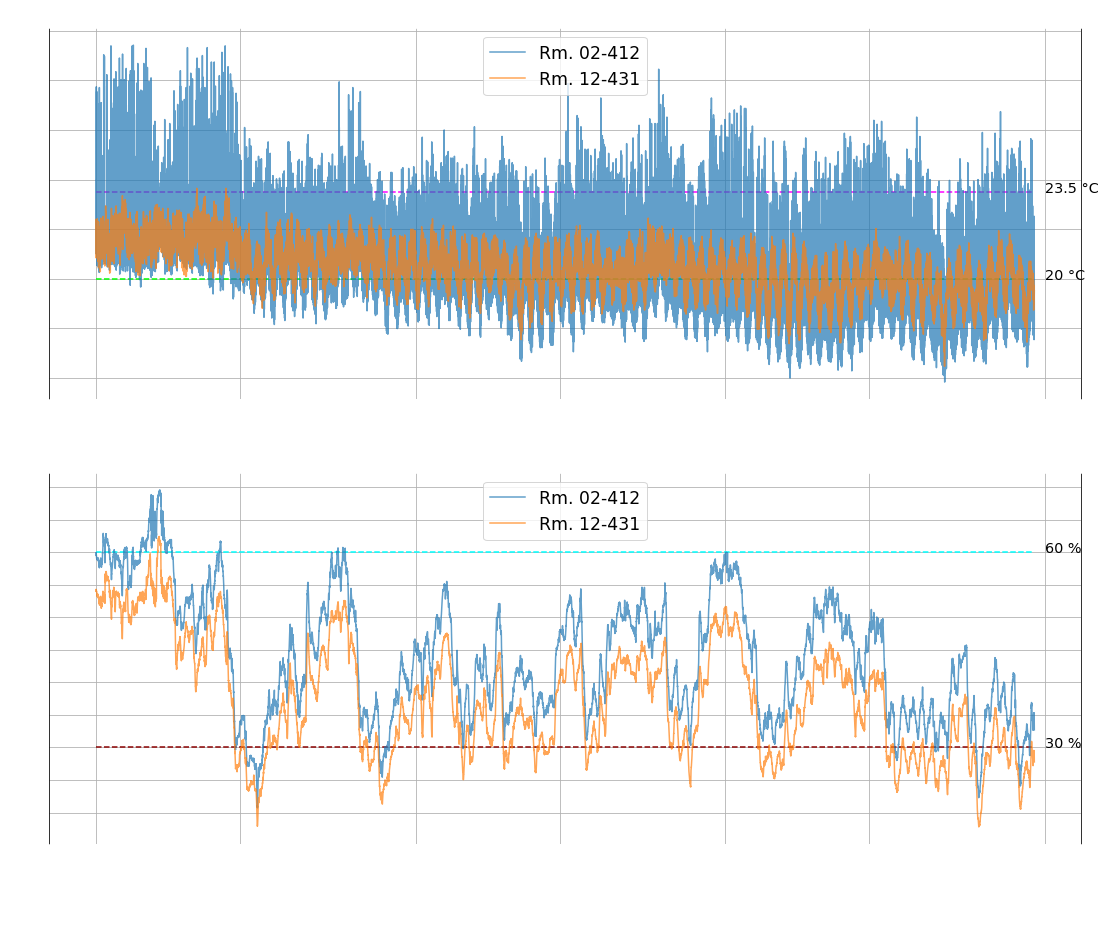

In [11]:
# visualisation of Temp & Huma of both rooms vs Date & time
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=False, sharex=True)

fig.set_size_inches(18.5, 15)
colour = 'black'
colour_2 = 'white'

ax1.set_title('Temp & Huma by time', color=colour_2, fontsize=22, fontweight='heavy')
ax1.spines['bottom'].set_color(colour_2)
ax1.spines['top'].set_color(colour_2)
ax1.set_ylabel('Temperature (°C)', fontweight ='bold', color = colour_2, fontsize=18.5)
ax1.tick_params(colors=colour_2)
ax1.grid(True)

ax2.spines['bottom'].set_color(colour_2)
ax2.spines['top'].set_color(colour_2)
ax2.set_xlabel('Date & Time', fontweight ='bold', color = colour_2, fontsize=18.5)
ax2.set_ylabel('Humidity (%)', fontweight ='bold', color = colour_2, fontsize=18.5)
ax2.tick_params(colors=colour_2)
ax2.grid(True)

plt.locator_params(nbins=15)
plt.xticks(rotation = 45, fontsize=15)

ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Temperature (°C)_02_412'], 
         label = 'Rm. 02-412', alpha = 0.7)
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Temperature (°C)_12_431'], 
         label = 'Rm. 12-431', alpha = 0.7)
ax1.legend(fontsize='xx-large', loc=9)
ax1.hlines(y=temp_acce_lower_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), 
           color='lime', linestyles='dashed')
ax1.hlines(y=temp_acce_upper_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), 
           color='magenta', linestyles='dashed')
ax1.text('2021-08-01', temp_acce_lower_lim,'20 °C', fontsize='x-large')
ax1.text('2021-08-01', temp_acce_upper_lim,'23.5 °C', fontsize='x-large')

ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Humidity (%)_02_412'], 
         label = 'Rm. 02-412', alpha = 0.7)
ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Humidity (%)_12_431'], 
         label = 'Rm. 12-431', alpha = 0.7)
ax2.legend(fontsize='xx-large', loc=9)
ax2.hlines(y=huma_acce_lower_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), 
           color='darkred', linestyles='dashed')
ax2.hlines(y=huma_acce_upper_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), 
           color='cyan', linestyles='dashed')
ax2.text('2021-08-01', huma_acce_lower_lim,'30 %', fontsize='x-large')
ax2.text('2021-08-01', huma_acce_upper_lim,'60 %', fontsize='x-large')

# Temp_Cel_Huma_12_431['Time_Diff'].plot()
plt.show()

Temperature measurements of room 12.431 had lower volatility than those in room 02.412,
however both data sets had significant measurements fallen lower than 20 °C.
further visualisations are required to display the proportions of temperature measurements
fallen outside 'acceptable temp' range.

Humidity measurements of both rooms followed similar trend 
with constant difference between 2 measurements (room 12.431 were ~8% dryer than room 02.412) and 
most were fallen in 30%-60%, i.e. 'acceptable huma'.

which indicated that the air-conditioning system did not quite adaptively satisfy the indoor thermal situations in both rooms , according to https://www.timeanddate.com/weather/australia/sydney/historic?month=5&year=2021, the ourdoor temperature were seemingly 20 - 24 °C during day time and 10 - 17 °C during evening and night time in 1st half of May 2021 with a wide ranged outdoor humidity from 50 to 91 %, but the temperature had risen up to above 23.5 °C in Rm.02.412 during that period, around 15 May 2021 onwards, the temperature in both rooms dropped gradually closer to 20 °C til July 2021, which may not be ideal shelters for occupants who might want to choose to stay indoor to work on assignments and coursework, as the temp https://www.timeanddate.com/weather/australia/sydney/historic?month=7&year=2021

*Will dig deeper into the relationships between temperature and humidity by applying thermal comfort theories.

       Temperature (°C)_02_412  Temperature (°C)_12_431
count             18205.000000             18205.000000
mean                 20.429939                20.441938
std                   2.056292                 0.949141
min                  15.840000                16.480000
25%                  18.900000                19.840000
50%                  20.290000                20.480000
75%                  21.710000                21.100000
max                  29.420000                23.650000
       Humidity (%)_02_412  Humidity (%)_12_431
count         18205.000000         18205.000000
mean             43.878452            37.377987
std               9.445582             8.776173
min              20.720000            17.810000
25%              36.000000            30.070000
50%              43.170000            36.390000
75%              50.760000            43.620000
max              69.580000            62.420000


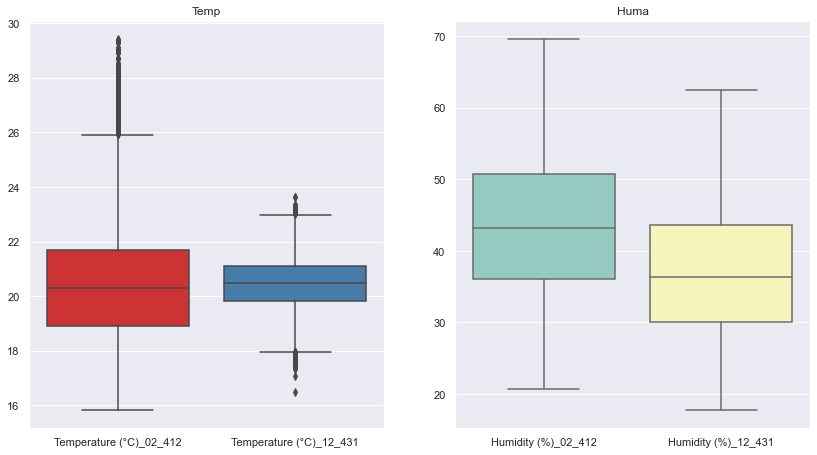

In [12]:
# statistically visualise distributions of temperature & humidity data of both rooms with boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7.5)})

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1 = sns.boxplot(data=all_Temp_Huma[['Temperature (°C)_02_412', 'Temperature (°C)_12_431']], 
                  palette="Set1", ax=ax1)
ax2 = sns.boxplot(data=all_Temp_Huma[['Humidity (%)_02_412', 'Humidity (%)_12_431']], 
                  palette="Set3", ax=ax2)
ax1.set_title('Temp')
ax2.set_title('Huma')
# Show plot
print(all_Temp_Huma[['Temperature (°C)_02_412', 'Temperature (°C)_12_431']].describe())
print(all_Temp_Huma[['Humidity (%)_02_412', 'Humidity (%)_12_431']].describe())

plt.show()

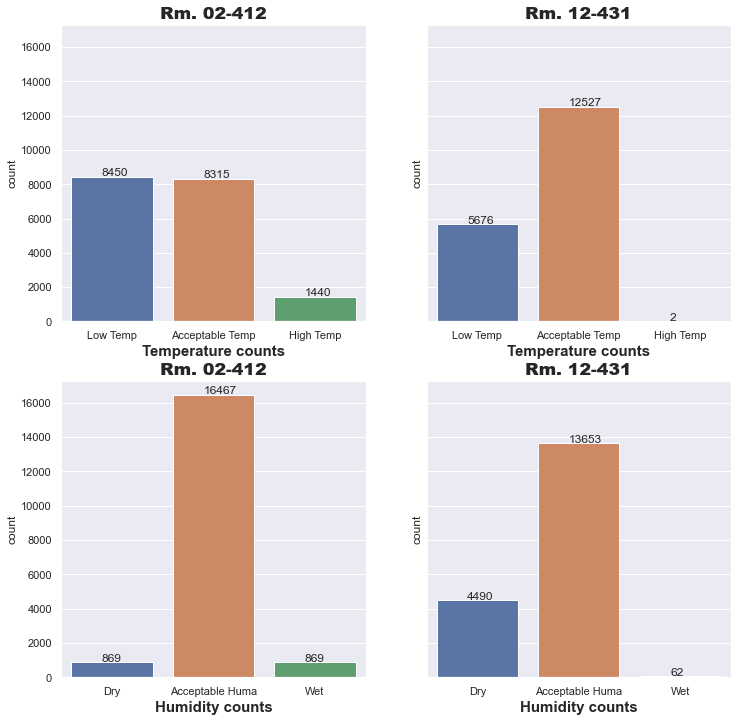

In [13]:
# show all categorical distributions temperature and humidity have fallen in
sns.set(rc={'figure.figsize':(12,12)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=False)

ax1 = sns.countplot(x='Temp_cats_02_412', data=all_Temp_Huma, ax=ax1)
ax2 = sns.countplot(x='Temp_cats_12_431', data=all_Temp_Huma, ax=ax2)
ax3 = sns.countplot(x='Huma_cats_02_412', data=all_Temp_Huma, ax=ax3)
ax4 = sns.countplot(x='Huma_cats_12_431', data=all_Temp_Huma, ax=ax4)

ax1.set_title('Rm. 02-412', fontsize=17.5, fontweight ='heavy')
ax2.set_title('Rm. 12-431', fontsize=17.5, fontweight ='heavy')
ax3.set_title('Rm. 02-412', fontsize=17.5, fontweight ='heavy')
ax4.set_title('Rm. 12-431', fontsize=17.5, fontweight ='heavy')

ax1.set_xlabel('Temperature counts', fontsize=15, fontweight ='bold')
ax2.set_xlabel('Temperature counts', fontsize=15, fontweight ='bold')
ax3.set_xlabel('Humidity counts', fontsize=15, fontweight ='bold')
ax4.set_xlabel('Humidity counts', fontsize=15, fontweight ='bold')

# annotating bars
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax3.patches:
        ax3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax4.patches:
        ax4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

plt.show()

r^2 = 0.145


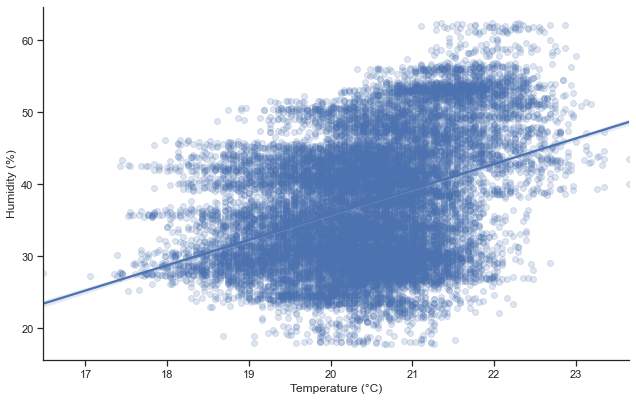

In [14]:
# #create scatterplot with regression line for huma vs temp for Rm.12.431
from sklearn.linear_model import LinearRegression 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 6.5)

x=Temp_Cel_Huma_12_431['Temperature (°C)']
y=Temp_Cel_Huma_12_431['Humidity (%)']

sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.18})
lin_reg = LinearRegression().fit(Temp_Cel_Huma_12_431[['Temperature (°C)']], Temp_Cel_Huma_12_431['Humidity (%)'])
r2 = lin_reg.score(Temp_Cel_Huma_12_431[['Temperature (°C)']], Temp_Cel_Huma_12_431['Humidity (%)'])

print(f'r^2 = {round(r2,3)}')
sns.despine()

plt.show()

low r^2 value indicates that the correlation of temperature and humidity is low. (strong correlation >= 0.8 according to xxx)

In [40]:
# # import package to calculate thermal comfort (PMV & PPD) https://pythermalcomfort.readthedocs.io/en/latest/reference/pythermalcomfort.html#predicted-mean-vote-pmv-and-predicted-percentage-of-dissatisfied-ppd
# import sys
# !{sys.executable} -m pip install pythermalcomfort

  Using cached pythermalcomfort-1.10.0-py2.py3-none-any.whl (42 kB)
  Using cached jos3-0.2.6-py3-none-any.whl (27 kB)


In [15]:
import pythermalcomfort
help(pythermalcomfort)

Help on package pythermalcomfort:

NAME
    pythermalcomfort

PACKAGE CONTENTS
    __main__
    cli
    models
    optimized_functions
    psychrometrics
    utilities

VERSION
    __version__ = '1.10.0'

FILE
    c:\anaconda3\lib\site-packages\pythermalcomfort\__init__.py




In [17]:
# test package 'pythermalcomfort' with first row of dataset - temp = 22.45 °C and huma = 59.56 % (2021-05-01 00:05:11)
from pythermalcomfort.models import pmv_ppd

warnings.filterwarnings('ignore')

date = all_Temp_Huma['Date & Time'].iloc[0]
test_op_temp = all_Temp_Huma['Temperature (°C)_02_412'].iloc[0]
air_spd_r = 0.1
test_rh = all_Temp_Huma['Humidity (%)_02_412'].iloc[0]
met = 1.1
clo = 1
wme = 0
standard = 'ASHRAE'
ce=0
## assuming Mean Radiant temperature == Air Temperature, according to XXX, therefore tdb = tr
test_results = pmv_ppd(tdb=test_op_temp, tr=test_op_temp, vr=air_spd_r, rh=test_rh, met=met, clo=clo, 
                       wme=wme, standard=standard)

# print(test_results['pmv'])

print(f"Date & Time: {date}, pmv: {test_results['pmv']}, ppd: {test_results['ppd']}.")

Date & Time: 2021-05-01 00:05:11, pmv: 0.07, ppd: 5.1.


In [18]:
# calculate all pmv & ppd indexes and create new column
all_Temp_Huma['pmv & ppd_02_412'] = all_Temp_Huma.apply(lambda x: pmv_ppd(x['Temperature (°C)_02_412'], 
                                                        x['Temperature (°C)_02_412'], air_spd_r, 
                                                        x['Humidity (%)_02_412'], met, clo, wme, 
                                                        standard), axis=1)

all_Temp_Huma['pmv & ppd_12_431'] = all_Temp_Huma.apply(lambda x: pmv_ppd(x['Temperature (°C)_12_431'], 
                                                        x['Temperature (°C)_12_431'], air_spd_r, 
                                                        x['Humidity (%)_12_431'], met, clo, wme, 
                                                        standard), axis=1)
warnings.filterwarnings(action='ignore')

all_Temp_Huma

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,Temperature (°C)_12_431,Humidity (%)_12_431,Temp_cats_12_431,Huma_cats_12_431,pmv & ppd_02_412,pmv & ppd_12_431
0,2021-05-01 00:05:11,22.45,59.56,Acceptable Temp,Acceptable Huma,21.58,54.02,Acceptable Temp,Acceptable Huma,"{'pmv': 0.07, 'ppd': 5.1}","{'pmv': -0.18, 'ppd': 5.6}"
1,2021-05-01 00:12:14,22.61,59.52,Acceptable Temp,Acceptable Huma,21.16,54.18,Acceptable Temp,Acceptable Huma,"{'pmv': 0.11, 'ppd': 5.3}","{'pmv': -0.28, 'ppd': 6.6}"
2,2021-05-01 00:19:19,21.97,59.66,Acceptable Temp,Acceptable Huma,22.39,54.23,Acceptable Temp,Acceptable Huma,"{'pmv': -0.05, 'ppd': 5.0}","{'pmv': 0.02, 'ppd': 5.0}"
3,2021-05-01 00:26:22,21.55,59.94,Acceptable Temp,Acceptable Huma,22.16,54.27,Acceptable Temp,Acceptable Huma,"{'pmv': -0.15, 'ppd': 5.4}","{'pmv': -0.03, 'ppd': 5.0}"
4,2021-05-01 00:33:26,22.81,59.78,Acceptable Temp,Acceptable Huma,21.87,54.25,Acceptable Temp,Acceptable Huma,"{'pmv': 0.16, 'ppd': 5.5}","{'pmv': -0.11, 'ppd': 5.2}"
...,...,...,...,...,...,...,...,...,...,...,...
18200,2021-07-30 23:25:03,19.68,35.10,Low Temp,Acceptable Huma,19.00,29.47,Low Temp,Dry,"{'pmv': -0.74, 'ppd': 16.4}","{'pmv': -0.92, 'ppd': 23.0}"
18201,2021-07-30 23:32:07,22.52,34.74,Acceptable Temp,Acceptable Huma,19.32,29.34,Low Temp,Dry,"{'pmv': -0.08, 'ppd': 5.1}","{'pmv': -0.85, 'ppd': 20.3}"
18202,2021-07-30 23:39:11,18.39,33.73,Low Temp,Acceptable Huma,19.26,28.77,Low Temp,Dry,"{'pmv': -1.04, 'ppd': 27.9}","{'pmv': -0.87, 'ppd': 20.9}"
18203,2021-07-30 23:46:15,21.06,33.00,Acceptable Temp,Acceptable Huma,19.45,28.44,Low Temp,Dry,"{'pmv': -0.43, 'ppd': 8.8}","{'pmv': -0.83, 'ppd': 19.4}"


https://escholarship.org/content/qt78v8055h/qt78v8055h_noSplash_5351f8b57f1cb6d56ba686959f233b92.pdf
Thermal comfort research literature
indicates that indoor air speed in hot climates should be set between 0.2 - 1.50 m/s, yet 0.2
m/s has been deemed in ASHRAE Standard 55 to be the threshold upper limit of draft
perception allowed inside air-conditioned buildings where occupants have no direct control
over their environment (de Dear, 2004)


https://www.designingbuildings.co.uk/wiki/Indoor_air_velocity
0.1 m/s	May be used as the assumed internal air velocity in some simple heat transfer calculations.

https://www.constructionspecifier.com/designing-for-comfort-iaq-air-distribution-per-ashrae-55-and-62-1/#:~:text=Ideal%20air%20velocity%20in%20the,fpm)%20during%20the%20heating%20mode.
Ideal air velocity in the space can vary with other factors, but the goal is
generally to keep spatial velocities less than 0.25 m/second during the cooling mode and 
less than 0.15 m/second (30 fpm) during the heating mode.

In [19]:
# split old "pmv & ppd" columns into individual 'pmv' & 'ppd' columns and drop them, and re-order new columns according to room no.
all_Temp_Huma = pd.concat([all_Temp_Huma.drop(['pmv & ppd_02_412'], axis=1), 
                           all_Temp_Huma['pmv & ppd_02_412'].apply(pd.Series)], axis=1)
all_Temp_Huma = pd.concat([all_Temp_Huma.drop(['pmv & ppd_12_431'], axis=1), 
                           all_Temp_Huma['pmv & ppd_12_431'].apply(pd.Series)], axis=1)

new_cols = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 
            'Huma_cats_02_412', 'Temperature (°C)_12_431', 'Humidity (%)_12_431', 'Temp_cats_12_431', 
            'Huma_cats_12_431', 'pmv_02_412', 'ppd_02_412', 'pmv_12_431', 'ppd_12_431']

all_Temp_Huma.columns = new_cols

new_cols_ordered = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 
                    'Huma_cats_02_412', 'pmv_02_412', 'ppd_02_412', 'Temperature (°C)_12_431', 
                    'Humidity (%)_12_431', 'Temp_cats_12_431', 'Huma_cats_12_431', 'pmv_12_431', 'ppd_12_431']

all_Temp_Huma = all_Temp_Huma.reindex(new_cols_ordered, axis=1)

all_Temp_Huma.head()

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,Temperature (°C)_12_431,Humidity (%)_12_431,Temp_cats_12_431,Huma_cats_12_431,pmv_12_431,ppd_12_431
0,2021-05-01 00:05:11,22.45,59.56,Acceptable Temp,Acceptable Huma,0.07,5.1,21.58,54.02,Acceptable Temp,Acceptable Huma,-0.18,5.6
1,2021-05-01 00:12:14,22.61,59.52,Acceptable Temp,Acceptable Huma,0.11,5.3,21.16,54.18,Acceptable Temp,Acceptable Huma,-0.28,6.6
2,2021-05-01 00:19:19,21.97,59.66,Acceptable Temp,Acceptable Huma,-0.05,5.0,22.39,54.23,Acceptable Temp,Acceptable Huma,0.02,5.0
3,2021-05-01 00:26:22,21.55,59.94,Acceptable Temp,Acceptable Huma,-0.15,5.4,22.16,54.27,Acceptable Temp,Acceptable Huma,-0.03,5.0
4,2021-05-01 00:33:26,22.81,59.78,Acceptable Temp,Acceptable Huma,0.16,5.5,21.87,54.25,Acceptable Temp,Acceptable Huma,-0.11,5.2


In [20]:
# next, categorise pmv and ppd indexes, check columns datatypes & proportions of each categories
pmv_low=-0.5
pmv_neu=0.5
ppd_sat=10

all_Temp_Huma['pmv_cats_02_412'] = np.where(all_Temp_Huma['pmv_02_412']<pmv_low,'Cool/Cold', 
                                       np.where(all_Temp_Huma['pmv_02_412']<=pmv_neu, 'Neutral', 'Warm/Hot'))
all_Temp_Huma['pmv_cats_02_412'] = pd.Series(all_Temp_Huma['pmv_cats_02_412'], dtype="category")

all_Temp_Huma['ppd_cats_02_412'] = np.where(all_Temp_Huma['ppd_02_412']<=ppd_sat,'Satisfied', 'Dissatisfied')
all_Temp_Huma['ppd_cats_02_412'] = pd.Series(all_Temp_Huma['ppd_cats_02_412'], dtype="category")

all_Temp_Huma['pmv_cats_12_431'] = np.where(all_Temp_Huma['pmv_12_431']<pmv_low,'Cool/Cold', 
                                       np.where(all_Temp_Huma['pmv_12_431']<=pmv_neu, 'Neutral', 'Warm/Hot'))
all_Temp_Huma['pmv_cats_12_431'] = pd.Series(all_Temp_Huma['pmv_cats_12_431'], dtype="category")

all_Temp_Huma['ppd_cats_12_431'] = np.where(all_Temp_Huma['ppd_12_431']<=ppd_sat,'Satisfied', 'Dissatisfied')
all_Temp_Huma['ppd_cats_12_431'] = pd.Series(all_Temp_Huma['ppd_cats_12_431'], dtype="category")

new_cols_ordered_2 = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 
                    'Huma_cats_02_412', 'pmv_02_412', 'ppd_02_412', 'pmv_cats_02_412', 'ppd_cats_02_412', 
                    'Temperature (°C)_12_431', 'Humidity (%)_12_431', 'Temp_cats_12_431', 'Huma_cats_12_431', 
                    'pmv_12_431', 'ppd_12_431', 'pmv_cats_12_431', 'ppd_cats_12_431']

all_Temp_Huma = all_Temp_Huma.reindex(new_cols_ordered_2, axis=1)

print(all_Temp_Huma.dtypes, '\n\n', 
      round(all_Temp_Huma['pmv_cats_02_412'].value_counts(normalize = True), 3), '\n\n', 
      round(all_Temp_Huma['ppd_cats_02_412'].value_counts(normalize = True), 3), '\n\n',
      round(all_Temp_Huma['pmv_cats_12_431'].value_counts(normalize = True), 3), '\n\n',
      round(all_Temp_Huma['ppd_cats_12_431'].value_counts(normalize = True), 3))

Date & Time                datetime64[ns]
Temperature (°C)_02_412           float64
Humidity (%)_02_412               float64
Temp_cats_02_412                 category
Huma_cats_02_412                 category
pmv_02_412                        float64
ppd_02_412                        float64
pmv_cats_02_412                  category
ppd_cats_02_412                  category
Temperature (°C)_12_431           float64
Humidity (%)_12_431               float64
Temp_cats_12_431                 category
Huma_cats_12_431                 category
pmv_12_431                        float64
ppd_12_431                        float64
pmv_cats_12_431                  category
ppd_cats_12_431                  category
dtype: object 

 Cool/Cold    0.530
Neutral      0.436
Warm/Hot     0.034
Name: pmv_cats_02_412, dtype: float64 

 Dissatisfied    0.575
Satisfied       0.425
Name: ppd_cats_02_412, dtype: float64 

 Cool/Cold    0.572
Neutral      0.428
Name: pmv_cats_12_431, dtype: float64 

 Dissati

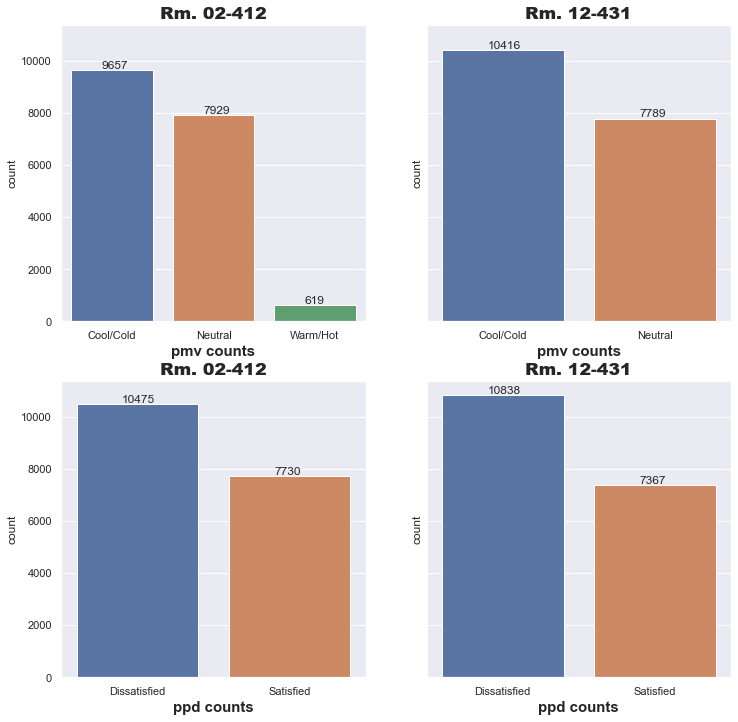

In [21]:
# show all categorical distributions pmv and ppd indexes have fallen into
sns.set(rc={'figure.figsize':(12,12)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True)

ax1 = sns.countplot(x='pmv_cats_02_412', data=all_Temp_Huma, ax=ax1)
ax2 = sns.countplot(x='pmv_cats_12_431', data=all_Temp_Huma, ax=ax2)
ax3 = sns.countplot(x='ppd_cats_02_412', data=all_Temp_Huma, ax=ax3)
ax4 = sns.countplot(x='ppd_cats_12_431', data=all_Temp_Huma, ax=ax4)

ax1.set_title('Rm. 02-412', fontsize=17.5, fontweight ='heavy')
ax2.set_title('Rm. 12-431', fontsize=17.5, fontweight ='heavy')
ax3.set_title('Rm. 02-412', fontsize=17.5, fontweight ='heavy')
ax4.set_title('Rm. 12-431', fontsize=17.5, fontweight ='heavy')

ax1.set_xlabel('pmv counts', fontsize=15, fontweight ='bold')
ax2.set_xlabel('pmv counts', fontsize=15, fontweight ='bold')
ax3.set_xlabel('ppd counts', fontsize=15, fontweight ='bold')
ax4.set_xlabel('ppd counts', fontsize=15, fontweight ='bold')

# annotating bars
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax3.patches:
        ax3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax4.patches:
        ax4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

plt.show()

from the count plot above, we can conclude that there are more time slots with 'cool/cold' sensations than 'neutral' and 'warm/hot' sensations, and it's more likely that less than 80% occupants are to feel 'satisfied' in more a half of time slots in both rooms.

let's do further visualisations to see how the pmv and ppd indexes have distributed along day & time.

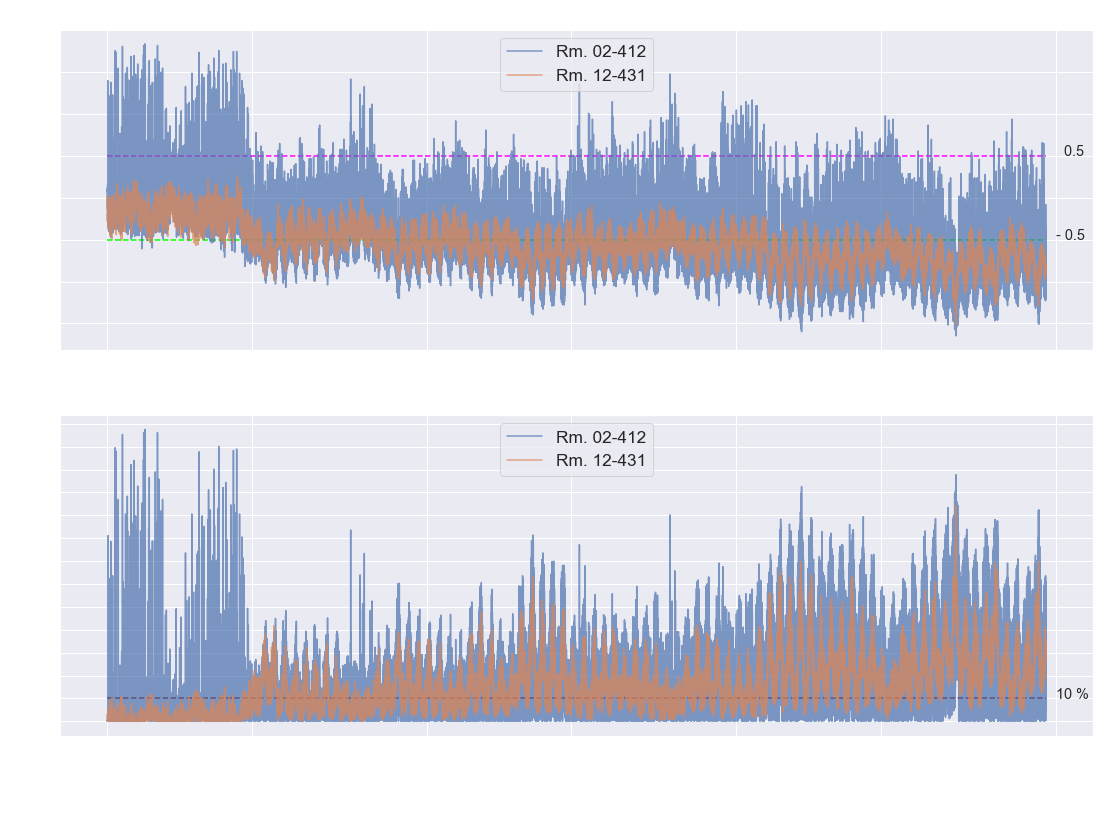

In [22]:
# visualisation of pmv & ppd indexes of both rooms vs Date & time
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=False, sharex=True)

fig.set_size_inches(18.5, 13)

ax1.set_title('pmv & ppd by time', color=colour_2, fontsize=22, fontweight='heavy')
ax1.spines['bottom'].set_color(colour_2)
ax1.spines['top'].set_color(colour_2)
ax1.set_ylabel('pmv', fontweight ='bold', color = colour_2, fontsize=18.5)
ax1.tick_params(colors=colour_2)
ax1.grid(True)

ax2.spines['bottom'].set_color(colour_2)
ax2.spines['top'].set_color(colour_2)
ax2.set_xlabel('Date & Time', fontweight ='bold', color = colour_2, fontsize=18.5)
ax2.set_ylabel('ppd (%)', fontweight ='bold', color = colour_2, fontsize=18.5)
ax2.tick_params(colors=colour_2)
ax2.grid(True)

plt.locator_params(nbins=15)
plt.xticks(rotation = 45, fontsize=15)

ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['pmv_02_412'], 
         label = 'Rm. 02-412', alpha = 0.7)
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['pmv_12_431'], 
         label = 'Rm. 12-431', alpha = 0.7)
ax1.legend(fontsize='xx-large', loc=9)
ax1.hlines(y=pmv_low, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), 
           color='lime', linestyles='dashed')
ax1.hlines(y=pmv_neu, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), 
           color='magenta', linestyles='dashed')
ax1.text('2021-08-01', pmv_low,'- 0.5', fontsize='x-large')
ax1.text('2021-08-01', pmv_neu,'  0.5', fontsize='x-large')

ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['ppd_02_412'], 
         label = 'Rm. 02-412', alpha = 0.7)
ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['ppd_12_431'], 
         label = 'Rm. 12-431', alpha = 0.7)
ax2.legend(fontsize='xx-large', loc=9)
ax2.hlines(y=ppd_sat, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), 
           color='darkred', linestyles='dashed')

ax2.text('2021-08-01', ppd_sat,'10 %', fontsize='x-large')

plt.show()

from the line plot above, we can conclude that occupants are more likely to receive 'warm/hot' sensations in first half of May 2021 (autumn, pmv>0.5 & ppd>10%), and in around mid May 2021, pmv values started to drop to close to -0.5 and dropped gradually to late July (Winter), ppd gradually rose farther from 10% within the same period too. both indexes reflects the temperature and humidity data we visualised in early stage in this project accordingly.

Next we focus on Rm.02.412 and it's time slots with high pmv index values as a hypothesis case for analytics,

first we will sort out the time slots which pmv index values are fallen into 'warm/hot' sensation category, 

and then we will sort out the time slots with the lowest 500 ppd values, i.e. the closest values to

the acceptable ppd range, we will find out in what proportion they can achieve "neutral" range in pmv index values 

and 'satisfied' range in ppd index values respectively, if the occupants chose to take off winter clothes,

and make the clo value = 0.61, equivalant to 'Trousers and long sleeve shirt'.

In [23]:
# Sort out time slots with hot sensation(pmv>0.5), with lowest 500 pmv values, 
high_pmv_02_412 = all_Temp_Huma.loc[all_Temp_Huma['pmv_02_412']>pmv_neu]

num_sort=500

cols_02_412 = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 
               'Huma_cats_02_412', 'pmv_02_412', 'ppd_02_412', 'pmv_cats_02_412', 'ppd_cats_02_412']

high_ppd_02_412_500th = high_pmv_02_412[cols_02_412].nsmallest(num_sort,'pmv_02_412').sort_values(by='Date & Time')
high_ppd_02_412_500th.reset_index(drop=True, inplace=True)
high_ppd_02_412_500th
# high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_cats_02_412']=='Dissatisfied']

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied
...,...,...,...,...,...,...,...,...,...
495,2021-07-29 13:00:23,25.29,26.24,High Temp,Dry,0.52,10.7,Warm/Hot,Dissatisfied
496,2021-07-29 14:53:26,25.55,24.18,High Temp,Dry,0.57,11.7,Warm/Hot,Dissatisfied
497,2021-07-30 15:38:08,25.65,33.23,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied
498,2021-07-30 17:17:07,25.39,36.73,High Temp,Acceptable Huma,0.63,13.2,Warm/Hot,Dissatisfied


In [24]:
# double confirm that they are time slots with hot sensations
display(high_ppd_02_412_500th[high_ppd_02_412_500th['pmv_cats_02_412']!='Warm/Hot'])
display(high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_cats_02_412']!='Dissatisfied'])
print(high_ppd_02_412_500th[['pmv_02_412', 'ppd_02_412']].describe())

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412


       pmv_02_412  ppd_02_412
count  500.000000  500.000000
mean     0.709400   16.249200
std      0.176859    5.994304
min      0.510000   10.400000
25%      0.570000   11.875000
50%      0.650000   13.800000
75%      0.810000   18.850000
max      1.160000   33.400000


In [25]:
# apply new clo value, to see if occupants can gain acceptable pmv and ppd indexes by taking off clothes
clo_new = 0.61 # 'Trousers and long sleeve shirt'

high_ppd_02_412_500th['pmv & ppd_02_412_new'] = high_ppd_02_412_500th.apply(lambda x: pmv_ppd(x['Temperature (°C)_02_412'], 
                                                                                              x['Temperature (°C)_02_412'], 
                                                                                              air_spd_r, x['Humidity (%)_02_412'], 
                                                                                              met, clo_new, wme, standard), axis=1)

high_ppd_02_412_500th = pd.concat([high_ppd_02_412_500th.drop(['pmv & ppd_02_412_new'], axis=1), 
                                   high_ppd_02_412_500th['pmv & ppd_02_412_new'].apply(pd.Series)], axis=1)

new_cols_hot_02_412_new_clo = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 
                               'Temp_cats_02_412', 'Huma_cats_02_412', 'pmv_02_412', 'ppd_02_412', 
                               'pmv_cats_02_412', 'ppd_cats_02_412', 'pmv_02_412_new_clo', 'ppd_02_412_new_clo']

high_ppd_02_412_500th.columns = new_cols_hot_02_412_new_clo

high_ppd_02_412_500th

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412,pmv_02_412_new_clo,ppd_02_412_new_clo
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied,0.01,5.0
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied,0.09,5.2
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied,0.25,6.2
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied,-0.01,5.0
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.10,5.2
...,...,...,...,...,...,...,...,...,...,...,...
495,2021-07-29 13:00:23,25.29,26.24,High Temp,Dry,0.52,10.7,Warm/Hot,Dissatisfied,-0.01,5.0
496,2021-07-29 14:53:26,25.55,24.18,High Temp,Dry,0.57,11.7,Warm/Hot,Dissatisfied,0.05,5.0
497,2021-07-30 15:38:08,25.65,33.23,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.15,5.5
498,2021-07-30 17:17:07,25.39,36.73,High Temp,Acceptable Huma,0.63,13.2,Warm/Hot,Dissatisfied,0.10,5.2


In [26]:
# check total time slots which no longer give hot sensations
improved_pmv_02_412 = high_ppd_02_412_500th[high_ppd_02_412_500th['pmv_02_412_new_clo']<=pmv_neu]
improved_ppd_02_412 = high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_02_412_new_clo']<=ppd_sat]
display(improved_pmv_02_412)
display(improved_ppd_02_412)
print(high_ppd_02_412_500th[['pmv_02_412_new_clo', 'ppd_02_412_new_clo']].describe())

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412,pmv_02_412_new_clo,ppd_02_412_new_clo
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied,0.01,5.0
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied,0.09,5.2
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied,0.25,6.2
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied,-0.01,5.0
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.10,5.2
...,...,...,...,...,...,...,...,...,...,...,...
495,2021-07-29 13:00:23,25.29,26.24,High Temp,Dry,0.52,10.7,Warm/Hot,Dissatisfied,-0.01,5.0
496,2021-07-29 14:53:26,25.55,24.18,High Temp,Dry,0.57,11.7,Warm/Hot,Dissatisfied,0.05,5.0
497,2021-07-30 15:38:08,25.65,33.23,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.15,5.5
498,2021-07-30 17:17:07,25.39,36.73,High Temp,Acceptable Huma,0.63,13.2,Warm/Hot,Dissatisfied,0.10,5.2


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412,pmv_02_412_new_clo,ppd_02_412_new_clo
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied,0.01,5.0
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied,0.09,5.2
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied,0.25,6.2
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied,-0.01,5.0
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.10,5.2
...,...,...,...,...,...,...,...,...,...,...,...
495,2021-07-29 13:00:23,25.29,26.24,High Temp,Dry,0.52,10.7,Warm/Hot,Dissatisfied,-0.01,5.0
496,2021-07-29 14:53:26,25.55,24.18,High Temp,Dry,0.57,11.7,Warm/Hot,Dissatisfied,0.05,5.0
497,2021-07-30 15:38:08,25.65,33.23,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.15,5.5
498,2021-07-30 17:17:07,25.39,36.73,High Temp,Acceptable Huma,0.63,13.2,Warm/Hot,Dissatisfied,0.10,5.2


       pmv_02_412_new_clo  ppd_02_412_new_clo
count          500.000000          500.000000
mean             0.175980            6.639200
std              0.218039            2.768558
min             -0.100000            5.000000
25%              0.010000            5.000000
50%              0.100000            5.200000
75%              0.312500            7.025000
max              0.740000           16.500000


In [27]:
# calculate % of improvement for pmv & ppd indexs with new clo value
improved_pmv_02_412_percentage = len(improved_pmv_02_412) / len(high_ppd_02_412_500th[high_ppd_02_412_500th['pmv_cats_02_412']=='Warm/Hot']) * 100
improved_ppd_02_412_percentage = len(improved_ppd_02_412) / len(high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_cats_02_412']=='Dissatisfied']) * 100
print(f'pmv in Rm.02.412 improved by {improved_pmv_02_412_percentage} % with new clo value')
print(f'ppd in Rm.02.412 improved by {improved_ppd_02_412_percentage} % with new clo value')

pmv in Rm.02.412 improved by 88.6 % with new clo value
ppd in Rm.02.412 improved by 87.8 % with new clo value


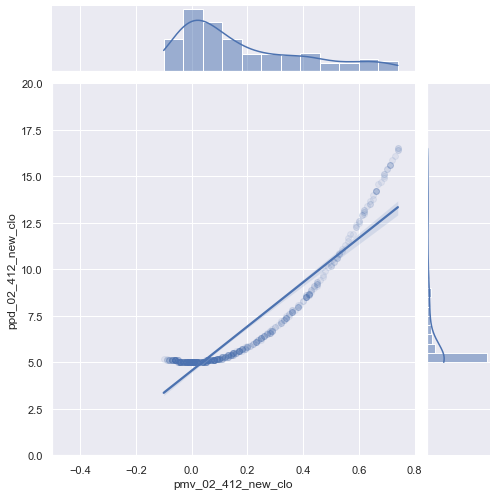

In [28]:
# check relationship between new pmv and ppd indexes
sns.set_style('darkgrid')
sns.jointplot(x='pmv_02_412_new_clo', y='ppd_02_412_new_clo', data=high_ppd_02_412_500th, kind='reg', 
              height=7, xlim=[-0.5,0.8], ylim=[0,20], palette='BrBG_r', scatter_kws={'alpha':0.087})

from the relational plot, histogram above, we can conclude that more than 87% of pmv and ppd index values of time slots are fallen into non 'warm/hot' sensations, with a high concentration within pmv ~ -0.1 to 0.3 and ppd ~ 5.0 to 6.3, and both values formed a strong non linear relationship.

In [29]:
'''
0. explain project background(why chose this date range, ), refer to ASHRAES, 
introduce EIF data base(with image, 
- why use this database, 
- why 2 rooms, 
- why temp and relative huma only, professor told that o2, co2 not accurate etc. 
so focus on thermal comfort.)

1. show how to extract desired datasets from EIF database (link from txt to dataframe)

2. import packages needed.

3. read data to dataframe for each category for each room, and check heads and datatypes.

4. Merge Temp & Huma columns by room no., and categorise temps and huma into ranges 
according to standards, and check dtypes.

5. due to uneven time differences among sensor records of 2 rooms, 
need to compute their valuecounts (about 70% are 00:07:04), 
adopt room which has higher % of 00:07:04 as time differences as left table in merge_asof(more even), 
then drop 'time_diff' columns, which are useless for future calculations and analyses.

6. create dataframe - all_temp_huma with merge_asof, 
which contains all date&time, temps and huma of both rooms, then re-order columns.

7. visualise trends of temp and huma sharing same time range (sharex), 
also include the adopted 'boundary temps and huma' linearly in graph.

8. create countplots for both designated temp and huma categories for both rooms 
with clear annotations and labels.

9. plot scatterplot+regression line on room 12-431 as e.g., 
to show that there is no strong correlation between temp and huma (r^2 = 0.036 and 0.145, only 0.8 or more would be concerned), 
therefore won't focus on that relationship.

10. introduce pythermalcomfort, briefly explain all variables, pmv & ppd + assumptions.
create new columns for both.

11. 
'''
## http://www.sensiblehouse.org/nrg_comfort.htm
## assuming Mean Radiant temperature == Air Temperature

"\n0. explain project background(why chose this date range, ), refer to ASHRAES, \nintroduce EIF data base(with image, \n- why use this database, \n- why 2 rooms, \n- why temp and relative huma only, professor told that o2, co2 not accurate etc. \nso focus on thermal comfort.)\n\n1. show how to extract desired datasets from EIF database (link from txt to dataframe)\n\n2. import packages needed.\n\n3. read data to dataframe for each category for each room, and check heads and datatypes.\n\n4. Merge Temp & Huma columns by room no., and categorise temps and huma into ranges \naccording to standards, and check dtypes.\n\n5. due to uneven time differences among sensor records of 2 rooms, \nneed to compute their valuecounts (about 70% are 00:07:04), \nadopt room which has higher % of 00:07:04 as time differences as left table in merge_asof(more even), \nthen drop 'time_diff' columns, which are useless for future calculations and analyses.\n\n6. create dataframe - all_temp_huma with merge_aso